# **Titanic: Machine Learning from Disaster - Part 3** #

In [4]:
import pandas as pd
import os
from helpers.settings import DATA_DIR, FIG_DIR, OUT_DIR
%matplotlib inline

# load the already cleaned datasets
train = pd.read_csv(os.path.join(DATA_DIR, 'train_cleaned.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test_cleaned.csv'))

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## **4. Data Exploration** ##

In this section, we try to understand the individual features more by visualization. We also try to do some transformation and processing if needed to make our data ready for the next step: modelling. First, let's take a look at the feature "Pclass".

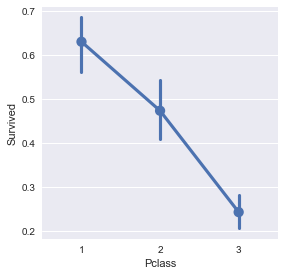

In [2]:
from helpers.plotting_helpers import plot_categories

# plot the distribution of Pclass
plot_categories(train, 'Pclass', 'Survived')

It is safe to infer that the higher a passenger's class, the higher his/her chance of surviving. 

Even though "Pclass" have values of [1, 2, 3], they are actually categorical feature, so keeping them as [1, 2, 3] will confuse our model later (like, class 3 is actually worse than class 1). So we need to encode this feature as numerical values.

In [3]:
# Convert categorical variable into dummy variables
train = pd.get_dummies(data = train, columns = ['Pclass'])
train.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,7.2500,0,0,1
1,1,female,38.0,1,0,71.2833,1,0,0
2,1,female,26.0,0,0,7.9250,0,0,1
3,1,female,35.0,1,0,53.1000,1,0,0
4,0,male,35.0,0,0,8.0500,0,0,1


In [4]:
test = pd.get_dummies(data = test, columns = ['Pclass'])
test.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,male,34.5,0,0,7.8292,0,0,1
1,female,47.0,1,0,7.0000,0,0,1
2,male,62.0,0,0,9.6875,0,1,0
3,male,27.0,0,0,8.6625,0,0,1
4,female,22.0,1,1,12.2875,0,0,1


Next, let's explore the "Age" feature and their relationship (if any) with chance of surviving.

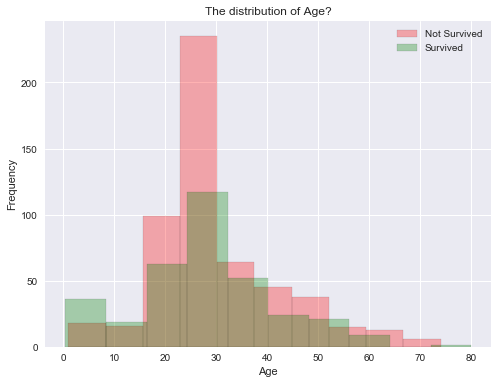

In [5]:
from helpers.plotting_helpers import plot_histogram

# Plot the distribution of "Age"
plot_histogram(train, 'Age', 'Survived')

The most popular age group on Titanic that day was between 20 and 30. There were very few old people that are over 60, and most of them coudn't survive, maybe because of their old age.

Instead of having 2 features "SibSp"(Number of siblings/spouses aboard) and "Parch"(Number of parents/children aboard), we can combine them into one single feature "Family", indicate the number of family members a person had on Titanic at that destiny day.

In [6]:
# Combine 2 features "SibSp" and "Parch", then drop them
train['Family'] = train['SibSp'] + train['Parch']
train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
train.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family
0,0,male,22.0,7.2500,0,0,1,1
1,1,female,38.0,71.2833,1,0,0,1
2,1,female,26.0,7.9250,0,0,1,0
3,1,female,35.0,53.1000,1,0,0,1
4,0,male,35.0,8.0500,0,0,1,0


In [7]:
test['Family'] = test['SibSp'] + test['Parch']
test.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
test.head()

,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family
0,male,34.5,7.8292,0,0,1,0
1,female,47.0,7.0000,0,0,1,1
2,male,62.0,9.6875,0,1,0,0
3,male,27.0,8.6625,0,0,1,0
4,female,22.0,12.2875,0,0,1,2


The next column we will explore is sex. Our hypothesis is that women would have a higher chance of surviving than their male counterparts.

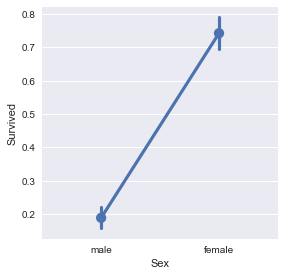

In [8]:
# Plot the distribution of "Sex"
plot_categories(train, 'Sex', 'Survived')

From this factorplot, we can see that a woman had 50% more chance of surviving than a man. This speaks a lot about the chivalry of men at that time! "Sex" is also a categorical variable, so we need to encode it into numerical feature.

In [9]:
train = pd.get_dummies(data = train, columns = ['Sex'])
train.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family,Sex_female,Sex_male
0,0,22.0,7.2500,0,0,1,1,0,1
1,1,38.0,71.2833,1,0,0,1,1,0
2,1,26.0,7.9250,0,0,1,0,1,0
3,1,35.0,53.1000,1,0,0,1,1,0
4,0,35.0,8.0500,0,0,1,0,0,1


In [10]:
test = pd.get_dummies(data = test, columns = ['Sex'])
test.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family,Sex_female,Sex_male
0,34.5,7.8292,0,0,1,0,0,1
1,47.0,7.0000,0,0,1,1,1,0
2,62.0,9.6875,0,1,0,0,0,1
3,27.0,8.6625,0,0,1,0,0,1
4,22.0,12.2875,0,0,1,2,1,0


The final feature is "Fare", which would highly correlated with the feature "Pclass".

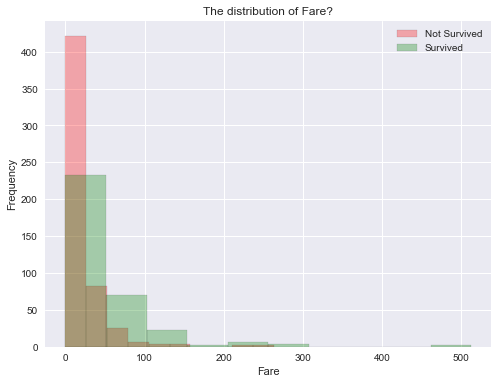

In [11]:
# Plot the distribution of "Fare"
plot_histogram(train, 'Fare', 'Survived')

The histograms indicate that the more you pay for your fare, the better your chance of survivor. This is inline with the previous observation on the relationship between a passenger's class and his/her rate of surviving

After exploring the data, we will export them to new .csv files.

In [12]:
train.to_csv(os.path.join(DATA_DIR, 'train_explored.csv'), index = False)
test.to_csv(os.path.join(DATA_DIR, 'test_explored.csv'), index = False)

We are now ready to do machine learning! In the next part, we will build our predictive models using machine learning algorithms.